# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Identify the features that are effecting during the image transformations

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for the model using Pytorch
* Build and optimize CNN architecture for predicting the labels of the images

## Dataset

The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains 22,500 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 2,500 images, named according to a numeric id. For each image in the test set, you should predict a probability that the image is a dog or a cat (1 = dog, 0 = cat).

## Grading = 20 Marks

## Setup Steps

In [ ]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()

notebook="Exact_Note_Book_Name" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data.zip")

# ipython.magic("sx mv AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1 AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


In [ ]:
!unzip -qq Cat_Dog_data.zip

In [ ]:
ls

Cat_Dog_data/  Cat_Dog_data.zip  __MACOSX/  sample_data/


## Basic Pytorch packages

**torchvision :**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms :**  This package is  used to perform preprocessing on images and operations sequentially.

**nn :**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable

In [ ]:
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 1.4.0 CUDA: True


In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

## **Stage 1:** Data Preprocessing
### 1Mark -> Load the train dataset

**Hint:** You can reuse your previous mini-hackathon "**M2_Mini_Hackathon5_CNN_with_Pytorch_V2**" for Data preprocessing.

[Hint for loading the data](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)


In [ ]:
image_size = (128,128)
loader = transforms.Compose([
                                transforms.Resize(image_size),
                                transforms.Grayscale(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.ImageFolder('/content/Cat_Dog_data/train', transform = loader)

In [ ]:
# YOUR CODE HERE for the DataLoader
batch_size = 100
# YOUR CODE HERE for the DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=10)

In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([100, 1, 128, 128]) type: torch.FloatTensor
y_train: torch.Size([100]) type: torch.LongTensor


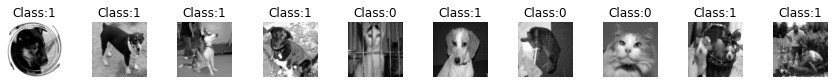

In [ ]:
# YOUR CODE HERE for plotting the images
pltsize=1
plt.figure(figsize=(15*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(128,128), cmap="gray")
    plt.title('Class:'+str(y_train[i].numpy()))

## **Stage 2:** CNN model

### 4Marks -> Create CNN Model and declare the loss function and optimizer

**Hint:** You can reuse your previous mini-hackathon "**M2_Mini_Hackathon5_CNN_with_Pytorch_V2**" for building the architecture. Save or copy the train model for making the predictions

[Hint for CNN model](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)


In [ ]:
# YOUR CODE HERE for the CNN model
# YOUR CODE HERE for declaring the loss function and optimizer
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional Layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))

        # Dropout to avoid overfitting
        self.drop_out = nn.Dropout()

        # Fully connected layers
        self.fc1 = nn.Linear(4*4*128, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)

        # Flatten
        out = out.view(out.size(0), -1)

        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
model = CNN()
model = model.to(device)
print(model)

#criterion = # YOUR CODE HERE : Explore and declare loss function
# loss_fn = torch.nn.BCELoss()
loss_fn = torch.nn.CrossEntropyLoss()

#optimizer = # YOUR CODE HERE : Explore on optimizer and define with the learning rate
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
learning_rate = 0.001;
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d

In [ ]:
def train(epoch, log_interval=100):
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.float())
        target = Variable(target)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = target.size(0)
        _, predicted = torch.max(output.data, 1)
        correct = (predicted == target).sum().item()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f}%'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), (correct / total) * 100))


In [ ]:
%%time
epochs = 10
lossv, accv = [], []
for epoch in range(1, epochs+1):
    train(epoch)

Train Epoch: 1 [0/22500 (0%)]	Loss: 0.840928	Accuracy: 49.00%
Train Epoch: 1 [10000/22500 (44%)]	Loss: 0.620185	Accuracy: 64.00%
Train Epoch: 1 [20000/22500 (89%)]	Loss: 0.646678	Accuracy: 60.00%
Train Epoch: 2 [0/22500 (0%)]	Loss: 0.555469	Accuracy: 78.00%
Train Epoch: 2 [10000/22500 (44%)]	Loss: 0.481329	Accuracy: 76.00%
Train Epoch: 2 [20000/22500 (89%)]	Loss: 0.481257	Accuracy: 74.00%
Train Epoch: 3 [0/22500 (0%)]	Loss: 0.514418	Accuracy: 72.00%
Train Epoch: 3 [10000/22500 (44%)]	Loss: 0.452533	Accuracy: 75.00%
Train Epoch: 3 [20000/22500 (89%)]	Loss: 0.351907	Accuracy: 81.00%
Train Epoch: 4 [0/22500 (0%)]	Loss: 0.508331	Accuracy: 82.00%
Train Epoch: 4 [10000/22500 (44%)]	Loss: 0.314353	Accuracy: 84.00%
Train Epoch: 4 [20000/22500 (89%)]	Loss: 0.280024	Accuracy: 90.00%
Train Epoch: 5 [0/22500 (0%)]	Loss: 0.242727	Accuracy: 87.00%
Train Epoch: 5 [10000/22500 (44%)]	Loss: 0.227070	Accuracy: 87.00%
Train Epoch: 5 [20000/22500 (89%)]	Loss: 0.354476	Accuracy: 88.00%
Train Epoch: 6 [0/22

In [ ]:
torch.save(model.state_dict(), 'conv_net_model.ckpt')

In [ ]:
loaded_model = CNN()
loaded_model.load_state_dict(torch.load('conv_net_model.ckpt'))
loaded_model.eval()

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d

### 4Marks -> Train the Model and validate it continuously to calculate the loss and accuracy for dataset across each epoch.

Iterate over images in the train_loader and perform the following steps.

1. First zero out the gradients using zero_grad()

2. We pass the data to the model

3. We calculate the loss using Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

**Hint:** You can reuse the training model of previous mini-hackathon "M2_Mini_Hackathon5_CNN_with_Pytorch_V2". Save or copy the train model for making the predictions

[Hint for CNN model](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)

In [ ]:
# YOUR CODE HERE

# Record loss and accuracy of the train dataset

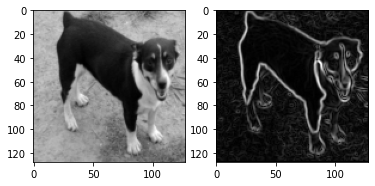

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data,filters
image = X_train[1,:,:,:]
plt.subplot(1,2,1)
plt.imshow(X_train[1,:,:,:].numpy().reshape(128,128),cmap="gray")
# ... or any other NumPy array!
edges = filters.sobel(image.numpy().reshape(128,128))
plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')

TypeError: ignored

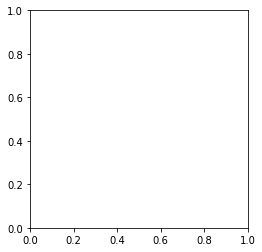

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline
image = X_train[20]
#plt.subplot(1,2,1)
plt.imshow(image,cmap="gray")
#image = image.numpy().reshape(128,128)
#mask = image < 87
#image[mask]= 255
#plt.subplot(1,2,2)
#plt.imshow(image, cmap='gray')

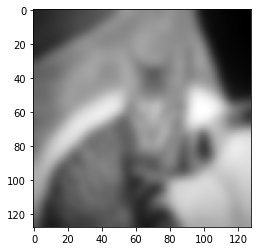

In [ ]:
from scipy import misc,ndimage
face = X_train[23,:,:,:].numpy().reshape(128,128)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)
#Results
plt.imshow(blurred_face,cmap="gray")

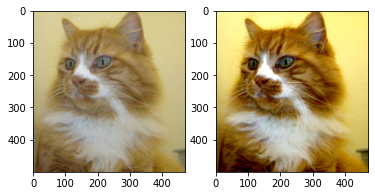

In [ ]:
from skimage.color import rgb2hsv
im = Image.open( 'Cat_Dog_data/test/cat/cat.10009.jpg')
#img =  cat.10009.jpgim.show()
plt.subplot(1,2,1)
plt.imshow(im)
from PIL import ImageEnhance
enh = ImageEnhance.Contrast(im)
plt.subplot(1,2,2)
plt.imshow(enh.enhance(1.8))

In [ ]:
type(enh)

PIL.ImageEnhance.Contrast